In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np
%matplotlib inline

# Importing data

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')

# Data summary and preprocessing

In [3]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

#### Missing values:
There are no missing values in any of columns.

## Outliers or anomalies

In [5]:
quantitave_columns = ['Previous Purchases', 'Review Rating', 'Purchase Amount (USD)', 'Age', 'Customer ID']

In [6]:
df[quantitave_columns].describe()

Previous Purchases  Review Rating  Purchase Amount (USD)          Age  \
count         3900.000000    3900.000000            3900.000000  3900.000000   
mean            25.351538       3.749949              59.764359    44.068462   
std             14.447125       0.716223              23.685392    15.207589   
min              1.000000       2.500000              20.000000    18.000000   
25%             13.000000       3.100000              39.000000    31.000000   
50%             25.000000       3.700000              60.000000    44.000000   
75%             38.000000       4.400000              81.000000    57.000000   
max             50.000000       5.000000             100.000000    70.000000   

       Customer ID  
count  3900.000000  
mean   1950.500000  
std    1125.977353  
min       1.000000  
25%     975.750000  
50%    1950.500000  
75%    2925.250000  
max    3900.000000

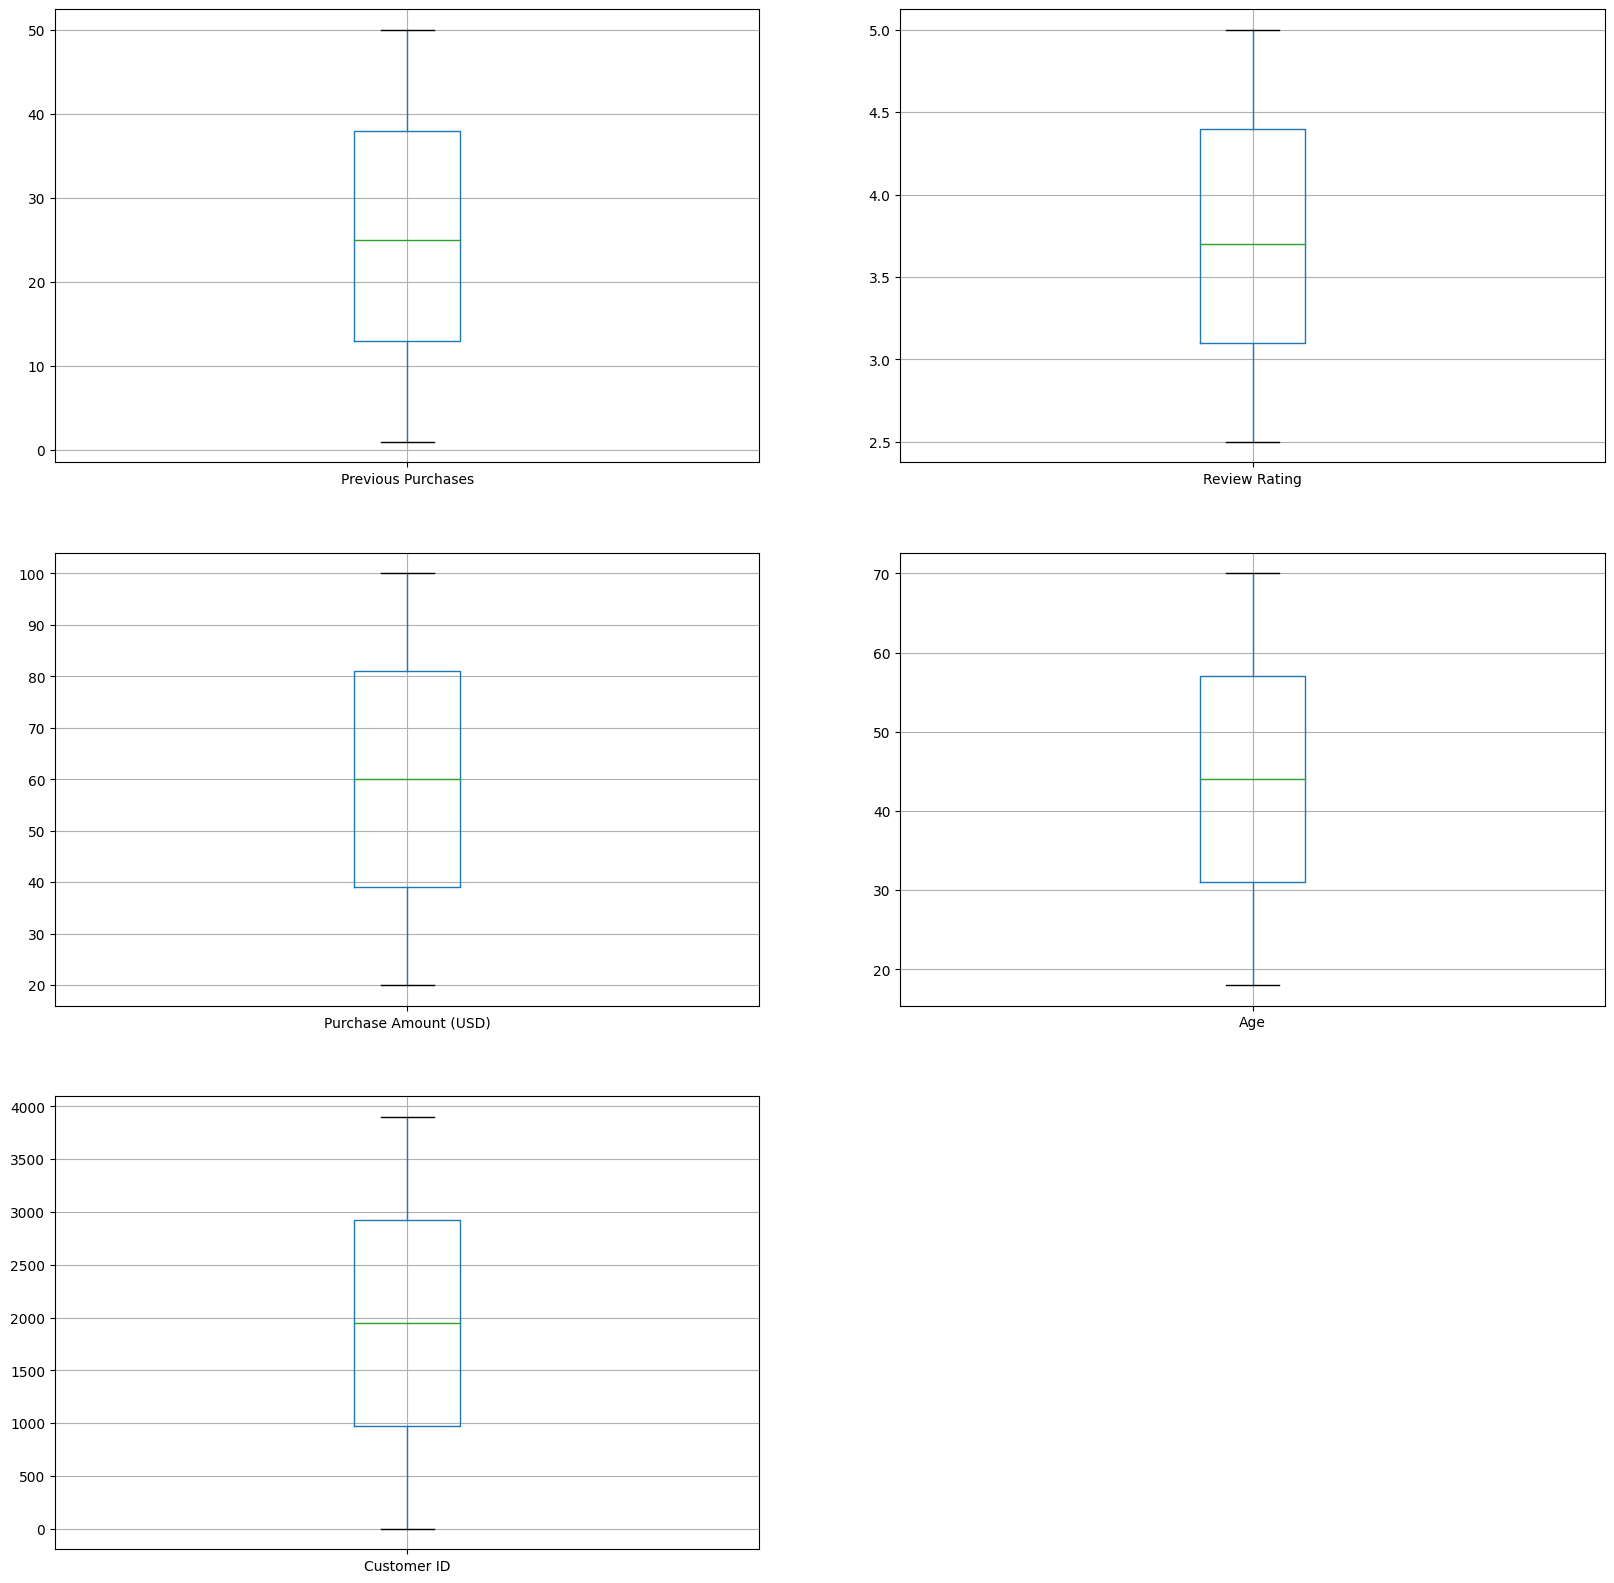

In [7]:
fig, axes = plt.subplots(3, 2 , figsize = (20, 20))
                         
for index, column in enumerate(quantitave_columns):
    rows = index//2
    cols = index%2
    df.boxplot(column, ax = axes[rows][cols])

plt.delaxes(ax = axes[2][1])
plt.show()

The quantitative columns Previous, Purchases, Review Rating, Purchase Amount (USD), Age and Customer ID appear to be normally distrubuted with no outliers.

### Quantitave columns

In [8]:
qualitative_columns = [i for i in df.columns if i not in quantitave_columns]

In [9]:
df.describe(include='object')

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

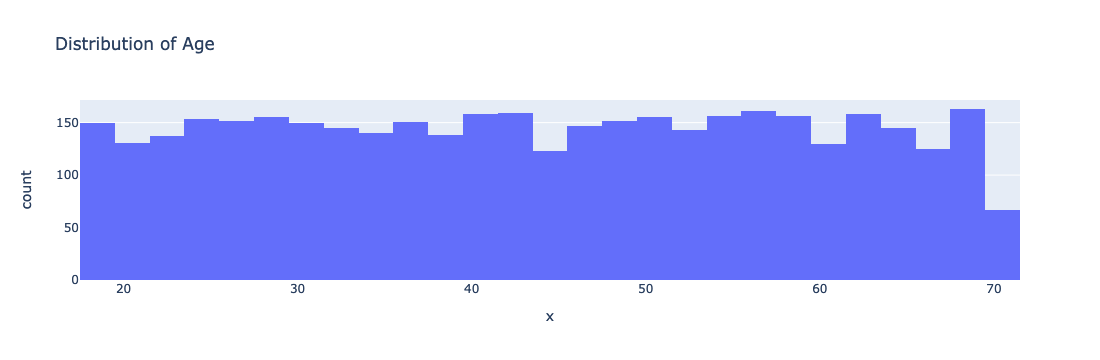

In [10]:
px.histogram(x=df['Age'], title='Distribution of Age')

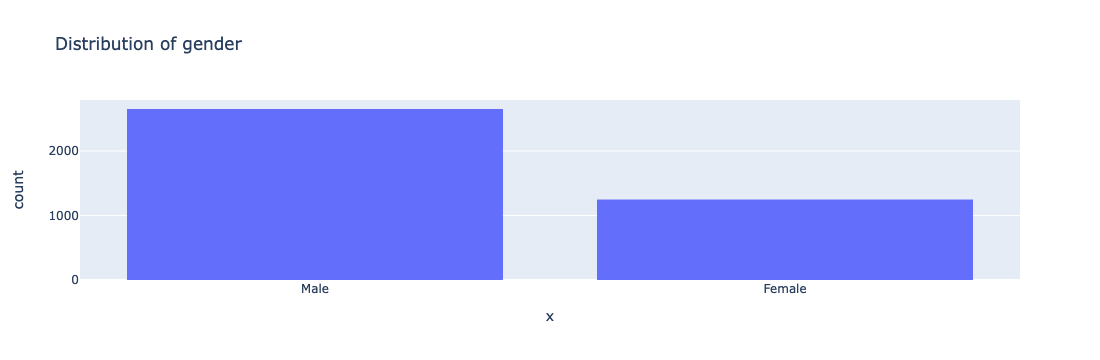

In [11]:
px.histogram(x=df['Gender'], title='Distribution of gender')

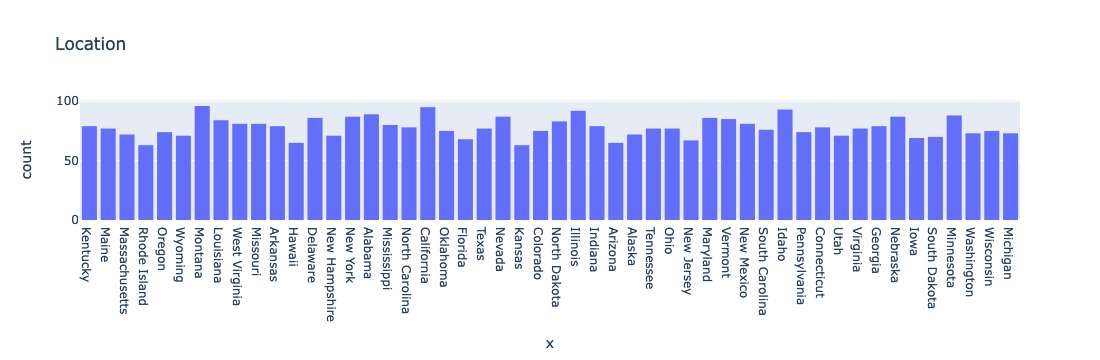

In [12]:
px.histogram(x=df['Location'], title='Location')

### Observations

- Age: Majority is between the age of 31 and 57.
- Gender: Majority is male
- Item Purchased: Top 5 purchased items from highest are jewelry, blouse, pants, shirt and dress.
- Category: Majority is clothing followed by accesories.
- Location: Top 5 countries which made most purchases from highest are Montana, California, Idaho, Illinois and Alabama.
- Size: Most picked size is medium followed by large, small and then xsmall.
- Color: Most picked colors are olive , yellow, silver, teal and green.
- Season: Seasons which most purchases are made are spring, fall, winter and summer, in the order from highest.
- Subscription Status: Majority is not subscribed.
- Shipping: The shipping prefered methods from most prefered are free shipping, standard, store pickup, next day air express and then 2 days shipping
- Discount Applied: discount was not applied in most of the purchases.
- Promo code: Promotion code was not applied in most of the purchases.
- Payment method: The most used payment mothod is PayPal followed by credit card, cash, debit card, vemno and then Bank transfer.         
- Frequency of purchase: Majority purchase after every 3 Months, folowed by annually, quarterly, monthly, bi-weekly, fortnightly and the weekly.

# Data Visualisation

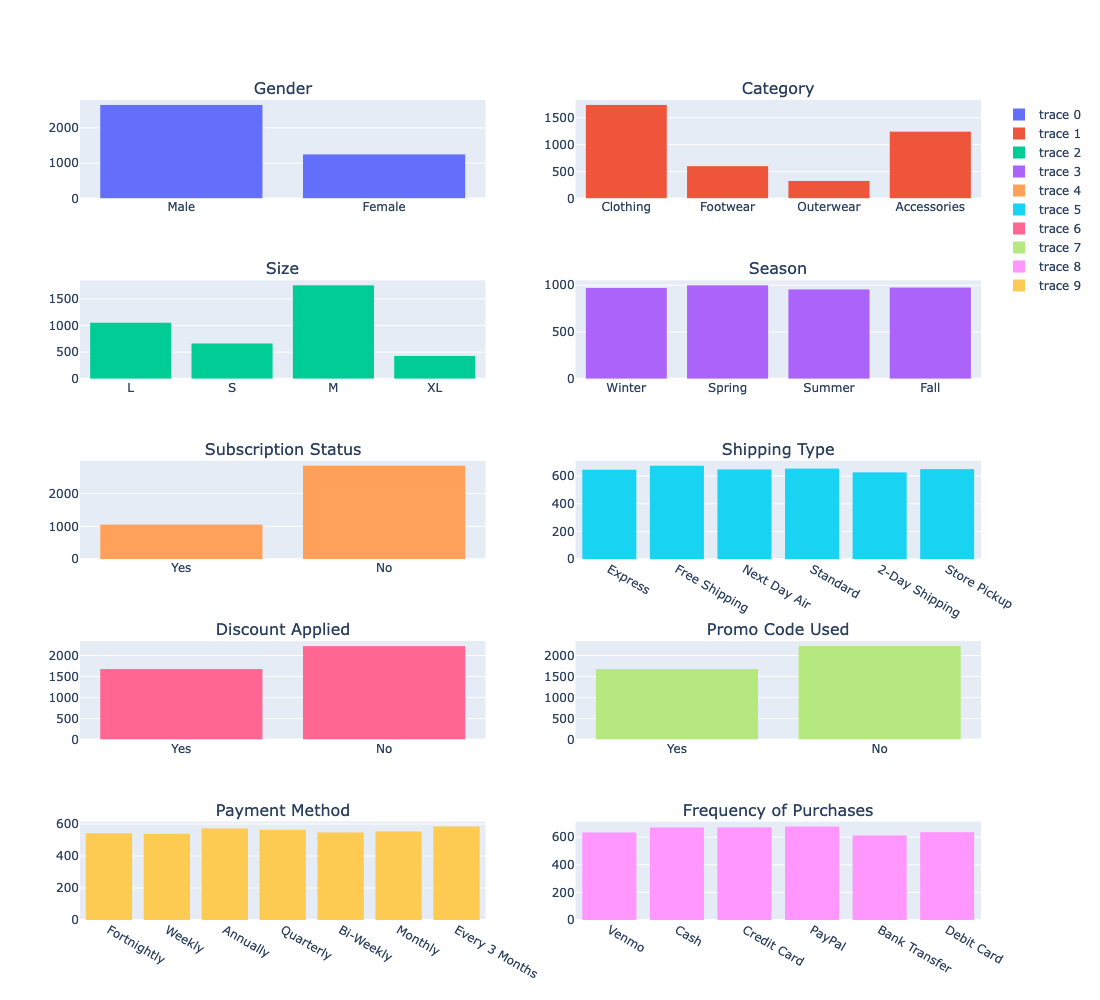

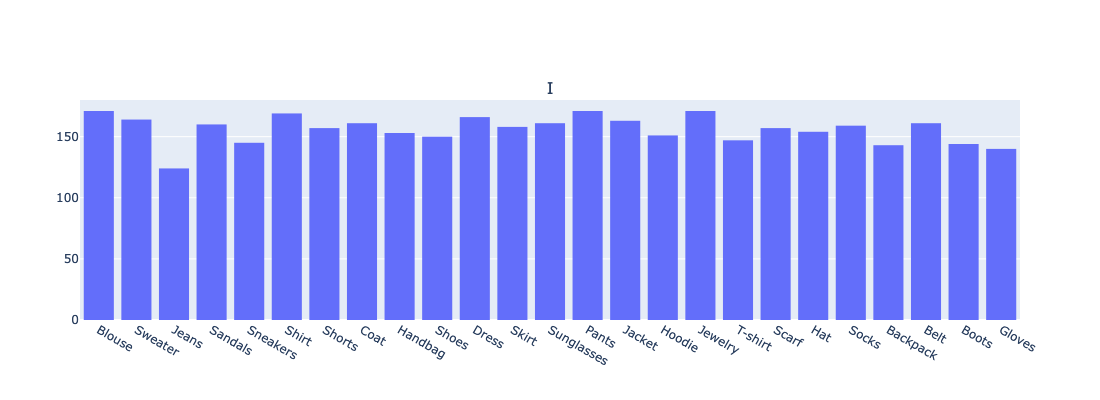

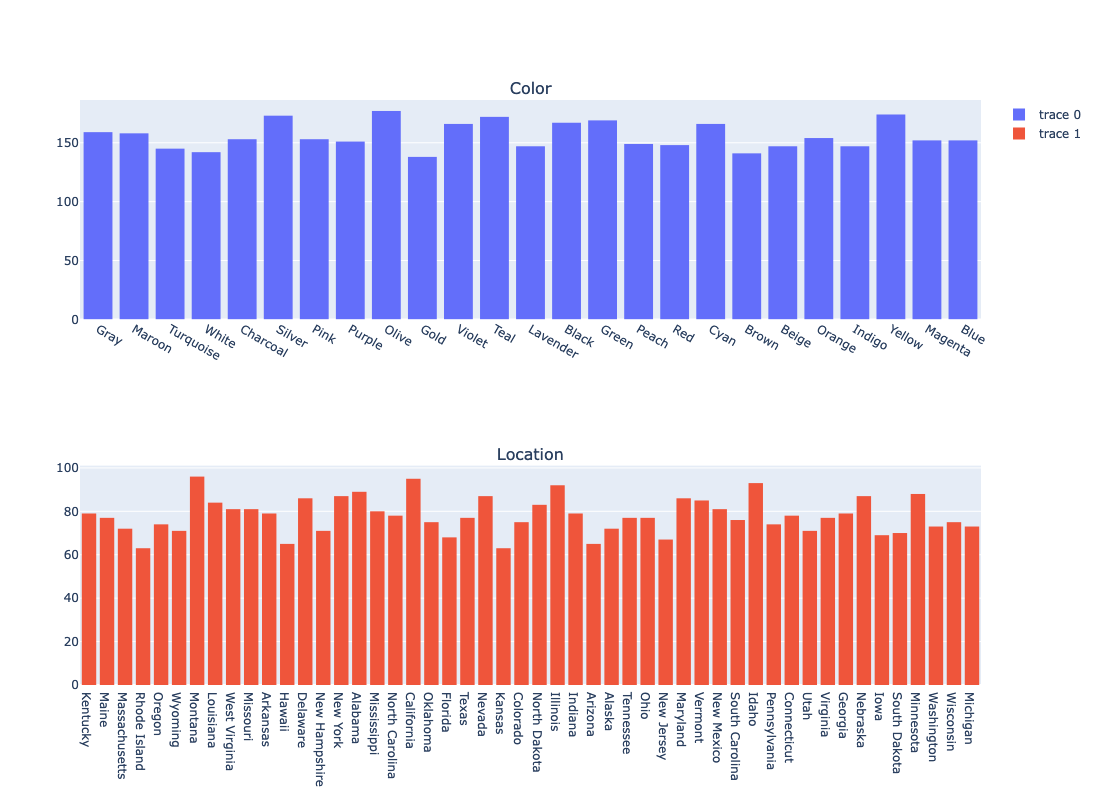

In [13]:
#Gender, Category, Location, Size, Color, Season, Subscription Status, Shipping Type, 
#Discount Applied, Promo Code Used, Payment Method, Frequency of Purchases



fig = make_subplots(rows = 5, cols = 2, subplot_titles=(qualitative_columns[0], 
                                                        qualitative_columns[2] 
                                                        ,qualitative_columns[4], 
                                                        qualitative_columns[6] 
                                                        ,qualitative_columns[7], 
                                                        qualitative_columns[8],
                                                       qualitative_columns[9] 
                                                        ,qualitative_columns[10], 
                                                        qualitative_columns[11],
                                                        qualitative_columns[12] ))

fig.add_trace(go.Histogram(x=df[qualitative_columns[0]]), row = 1 , col = 1) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[2]]), row = 1 , col = 2) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[4]]), row = 2 , col = 1)
fig.add_trace(go.Histogram(x=df[qualitative_columns[6]]), row = 2 , col = 2) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[7]]), row = 3 , col = 1) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[8]]), row = 3 , col = 2)
fig.add_trace(go.Histogram(x=df[qualitative_columns[9]]), row = 4 , col = 1) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[10]]), row = 4 , col = 2) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[11]]), row = 5 , col = 2)
fig.add_trace(go.Histogram(x=df[qualitative_columns[12]]), row = 5 , col = 1) 

fig.update_layout(height=1000, width=900)
fig.show()

# Item Purchased
fig = make_subplots(rows = 1, cols = 1, subplot_titles=(qualitative_columns[1]))
fig.add_trace(go.Histogram(x=df[qualitative_columns[1]]), row = 1 , col = 1) 
fig.update_layout(height=400, width=900)
fig.show()
                    
#Color , Location
fig = make_subplots(rows = 2, cols = 1, subplot_titles=(qualitative_columns[5], 
                                                        qualitative_columns[3]))
                    
fig.add_trace(go.Histogram(x=df[qualitative_columns[5]]), row = 1 , col = 1) 
fig.add_trace(go.Histogram(x=df[qualitative_columns[3]]), row = 2 , col = 1)
                    
fig.update_layout(height=800, width=950)
fig.show()


# Data analysis customer's behaviour.

In [14]:
# default settings for graphs
default_figure_size = (12,8)
default_axis_fontsize = (14)
default_fontweight = 'bold'
default_title_size = 18
default_location = 'best'
default_width = 0.8

#Grouping age
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['below 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and above']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# categories
clothing = df[df['Category'] =='Clothing']
outerwear = df[df['Category'] == 'Outerwear']
footwear = df[df['Category'] =='Footwear']
accessories = df[df['Category'] == 'Accessories']

In [15]:
lis = [clothing, footwear, outerwear, accessories]

labels = ['Clothing','Footwear','Outerwear', 'Accessories']

## Item purchased by category

In [77]:
clothing_itm_purchased = pd.DataFrame(data = clothing.groupby('Item Purchased')['Category'].agg('count')).rename(columns={'Category':'No of items purchased'})
clothing_itm_purchased

No of items purchased
Item Purchased                       
Blouse                            171
Dress                             166
Hoodie                            151
Jeans                             124
Pants                             171
Shirt                             169
Shorts                            157
Skirt                             158
Socks                             159
Sweater                           164
T-shirt                           147

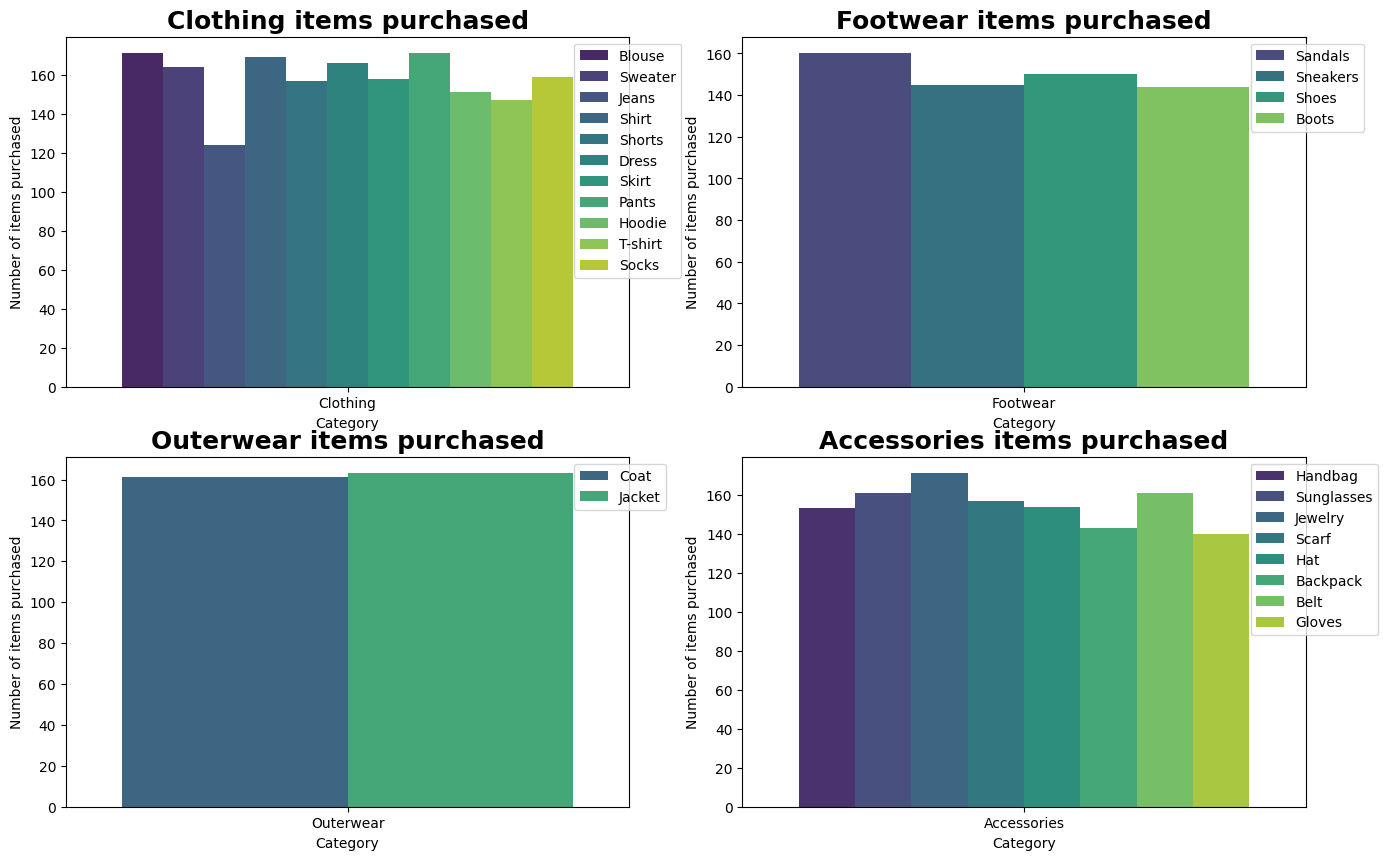

In [16]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
for i, category in enumerate(lis):
    
    row = i//2
    col = i%2
    sns.countplot(x = 'Category', hue = 'Item Purchased', data = category, palette='viridis', ax = axes[row][col])
    plt.title('Clothing purchased by category')
    axes[row, col].set_title(f'{labels[i]} items purchased',size=default_title_size,fontweight=default_fontweight)
    axes[row, col].set(ylabel=f'Number of items purchased')
    axes[row, col].legend(loc=default_location, bbox_to_anchor = (0.89,1))
    
plt.show()


## Category according to gender

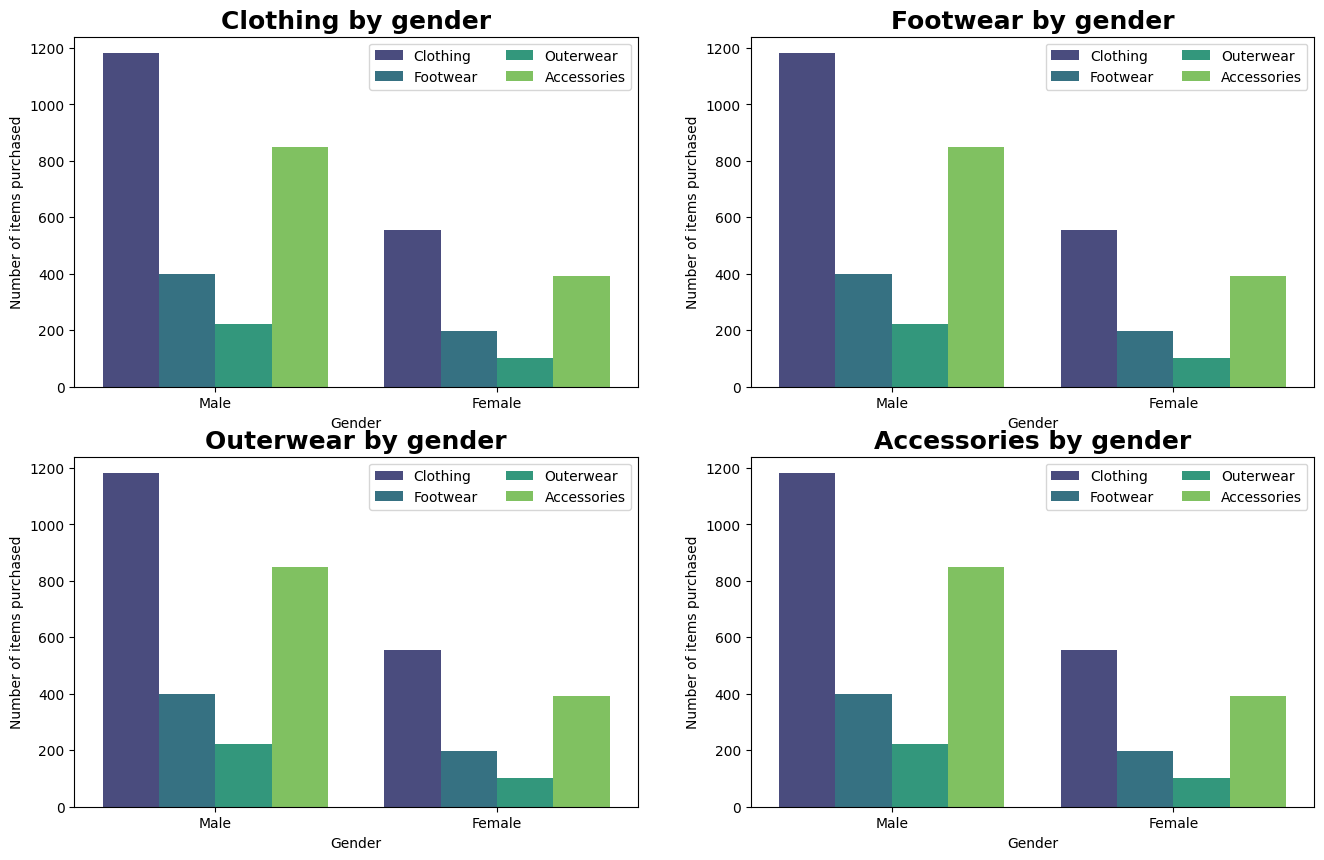

In [17]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
for i, category in enumerate(lis):
    row = i//2
    col = i%2
    sns.countplot(x = 'Gender', hue = 'Category', data = df, palette='viridis', ax = axes[row,col])
    axes[row, col].set_title(f'{labels[i]} by gender',size=default_title_size,fontweight=default_fontweight)
    axes[row, col].set(ylabel=f'Number of items purchased')
    axes[row, col].legend(loc=default_location, ncol = 2)

plt.show()

### Observations

Item purchased by gender from most sold. 

Male
- Clothing :- Top 5 are pants, dress, sweater, shirt, shorts.
- Footware :- Sandals, shoes, sneakers and boots.
- Outerwear :- Coat, Jewelry.
- Accessories :- Top 5 are jewelry, scarf, backpack, belt, sunglasses.

Female
- Clothing :- Top 5 are blouse, shirt, socks, dress, hoodie.
- Footware :- Sandals, boots, shoes and sneakers.
- Outerwear :- Jacket, coat.
- Accessories :- Top 5 are handbag, sunglasses, belt, hat, Jewelry.

## Item Purchased by age

<Axes: xlabel='AgeGroup', ylabel='count'>

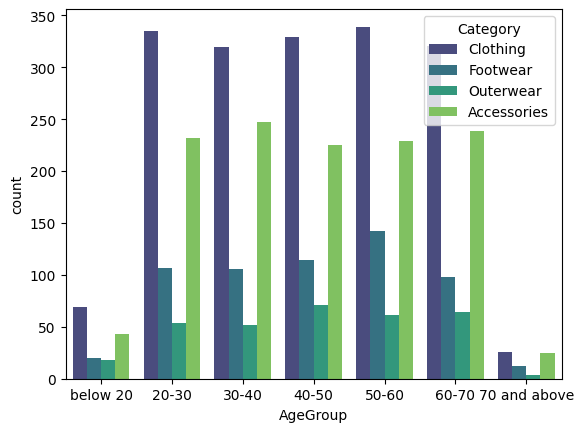

In [18]:
 sns.countplot(x='AgeGroup', hue='Category', data=df, palette='viridis')

### Observations 
Most Items purchased by age group 

below 20 
- Clothing - Skirt                                              
- Footware - Sneakers
- Outwear - Coat
- Accessories - sunglasses

20 - 30
- Clothing - Dress
- Footware - Sneakers
- Outwear - Coat
- Accessories - Belt

30 - 40
- Clothing - Shirt
- Footware - Boots
- Outwear - Jacket
- Accessories - Jewelry

40 - 50
- Clothing - Dress                                              
- Footware - Sandals
- Outwear - Jacket
- Accessories - Belt and scarf

50 - 60
- Clothing - Blouse                                              
- Footware - Sandals
- Outwear - Coat
- Accessories - sunglasses

60 - 70
- Clothing - Dress                                              
- Footware - Shoes
- Outwear - Jacket
- Accessories - Jewelry

70 and above
- Clothing - Socks                                              
- Footware - Sneaker
- Outwear - Jacket and coat
- Accessories - Jacket and jewelry

# Items purchased by Purchase amount 

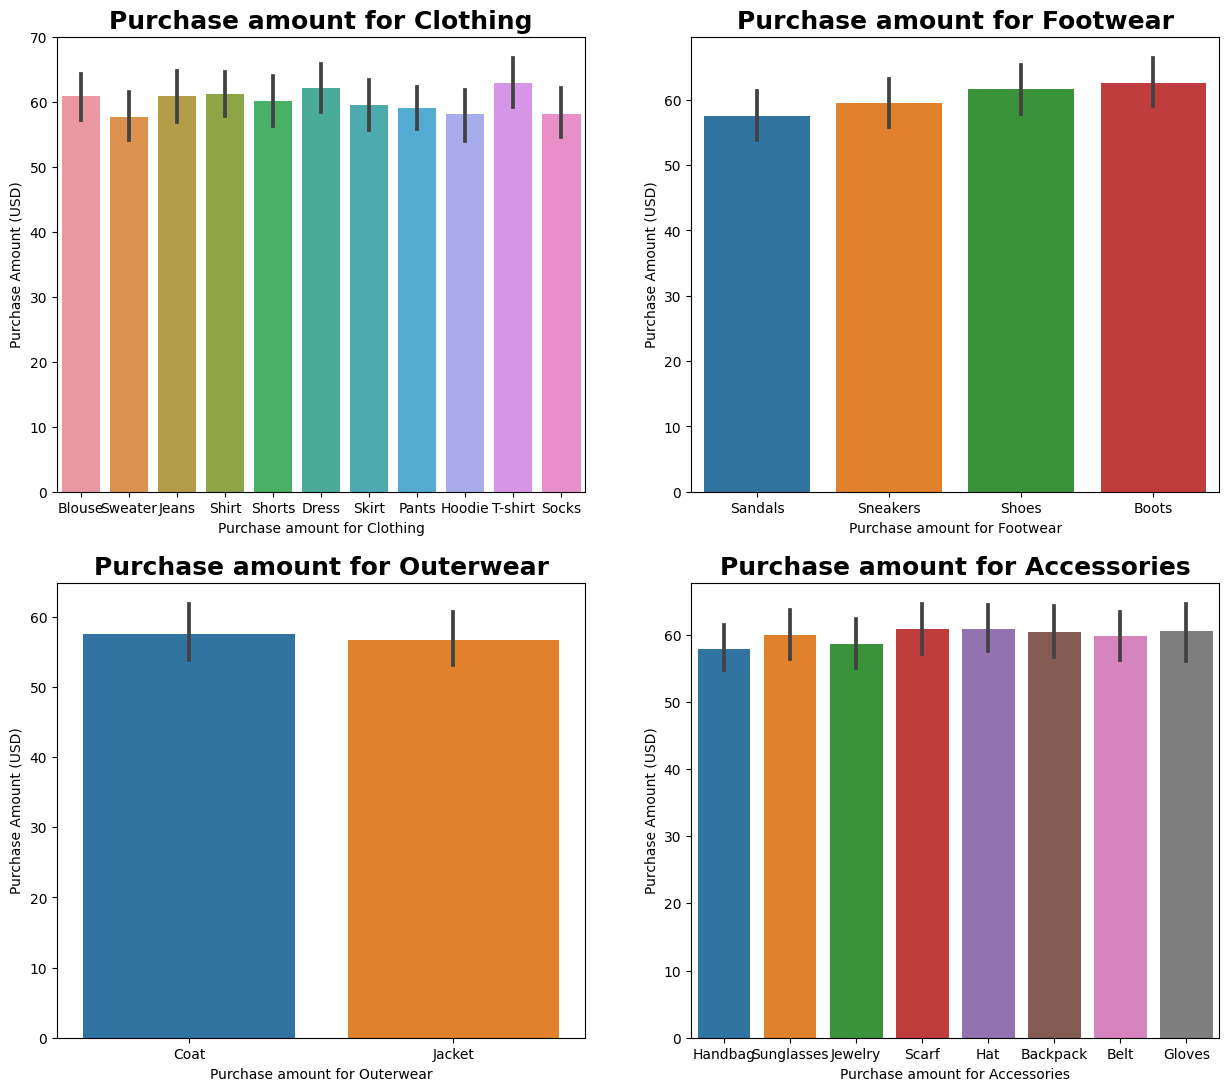

In [20]:
fig, axes = plt.subplots(2,2,figsize=(15,13))
for i, category in enumerate(lis):
    row = i//2
    col = i%2
    sns.barplot(data = category, x = 'Item Purchased', y = 'Purchase Amount (USD)', ax = axes[row,col])
    axes[row, col].set_title(f'Purchase amount for {labels[i]}',size=default_title_size,fontweight=default_fontweight)
    axes[row, col].set(xlabel=f'Purchase amount for {labels[i]}')
    

plt.show()

### Observations

Cost of the purchased item(s) from highest by categories.

- Clothing :- Top 5 are blouse, pants, shirt, dress, sweater.
- Footware :- Sandals, shoes, sneakers, boots.
- Outerwear :- Coat, jacket.
- Accessories :- Top 5 are Jewelry, belt,sunglasses, scarf, hat.

# Item purchased by season

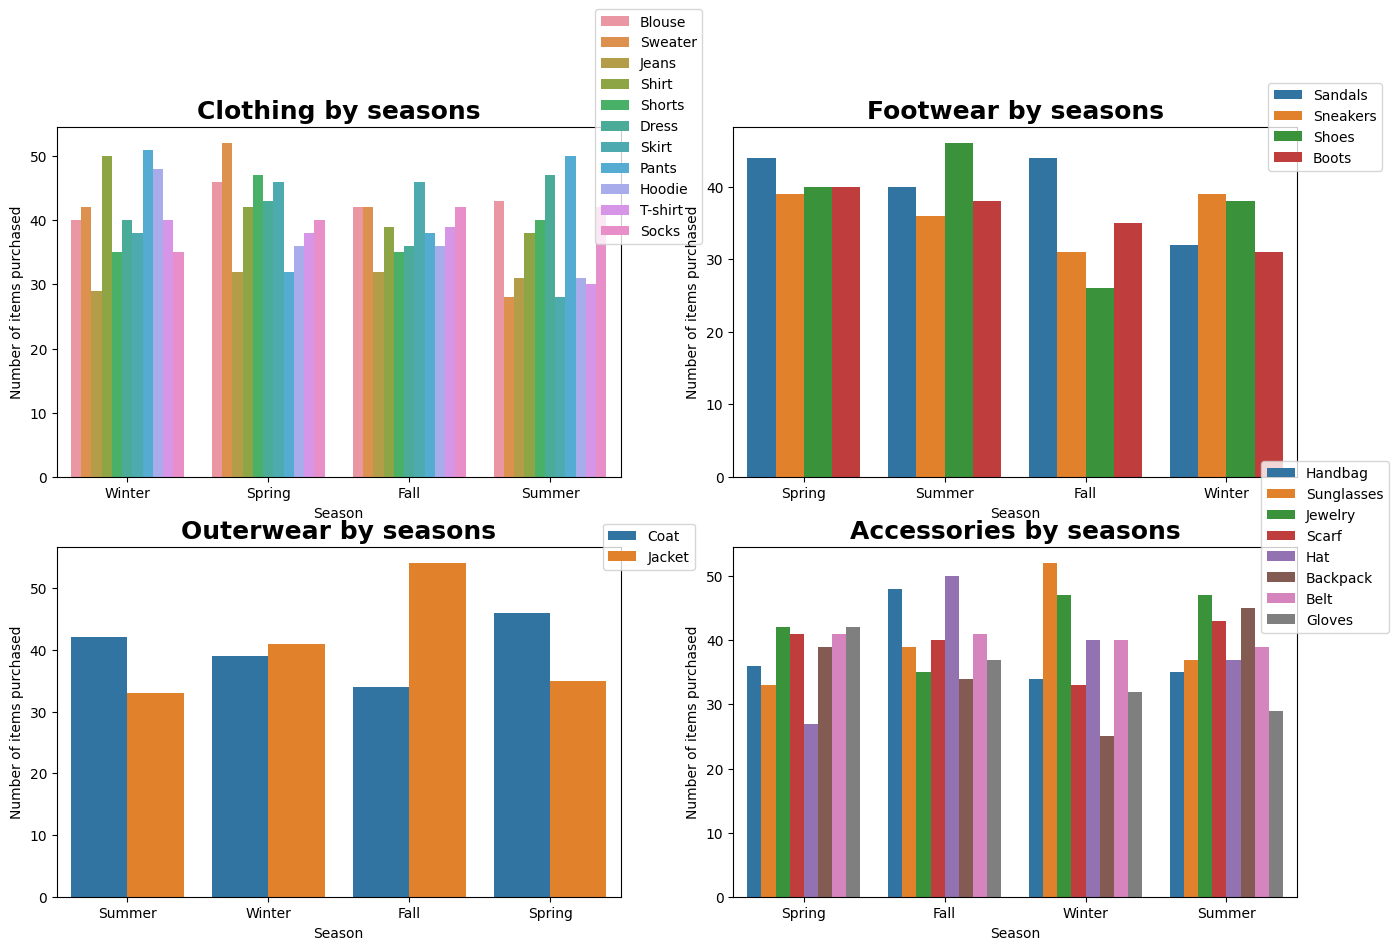

In [22]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
for i, category in enumerate(lis):
    row = i//2
    col = i%2
    sns.countplot(data = category, hue = 'Item Purchased', x = 'Season', ax = axes[row,col])
    axes[row, col].set_title(f'{labels[i]} by seasons',size=default_title_size,fontweight=default_fontweight)
    axes[row, col].set(ylabel=f'Number of items purchased')
    axes[row, col].legend(loc='center', bbox_to_anchor = (1.05,1))

plt.show()

### Observations

Purchased items by season

#### Summer

- Clothing :- Top 5 are pants, dress, blouse, socks, shorts.
- Footware :- Shoes, sandals, boots, sneakers.
- Outerwear :- Coat, jacket.
- Accessories :- Top 5 are Jewelry, backpack, scarf, belt, hat.

#### Winter

- Clothing :- Top 5 are pants, shirt, hoodie, sweater, blouse.
- Footware :- Sneakers, shoes, sandals, boots.
- Outerwear :- Jacket, coat.
- Accessories :- Top 5 are sunglasses, jewelry, belt, hat, handbag.

#### Fall

- Clothing :- Top 6 are skirt, blouse and socks and sweater, shirt and t-shirt.
- Footware :- Sandals, boots, sneakers, shoes.
- Outerwear :- Jacket, coat.
- Accessories :- Top 5 are hat, handbag, belt, scarf, sunglasses.

#### Spring

- Clothing :- Top 5 are sweater, shorts, blouse and shirt and dress.
- Footware :- Sandals, boots and shoes, sneakers.
- Outerwear :- Coat, jacket.
- Accessories :- Top 5 are gloves and jewelry, belt and scarf, backpack.

# Item purchased by size

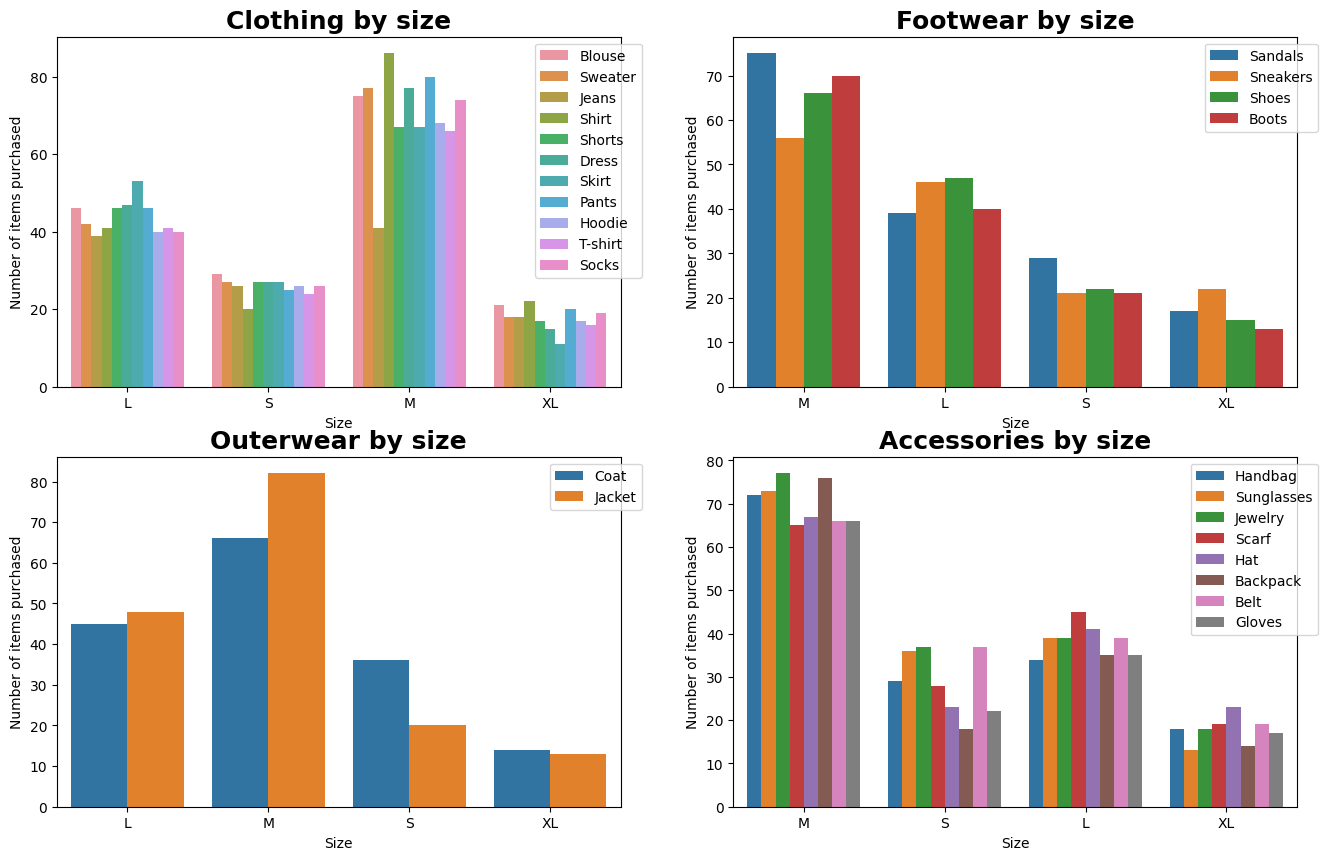

In [23]:
from matplotlib.font_manager import FontProperties
fig, axes = plt.subplots(2,2,figsize=(16,10))
for i, category in enumerate(lis):
    row = i//2
    col = i%2
    sns.countplot(data = category, hue = 'Item Purchased', x = 'Size', ax = axes[row,col])
    axes[row, col].set_title(f'{labels[i]} by size',size=default_title_size,fontweight=default_fontweight)
    axes[row, col].set(ylabel=f'Number of items purchased')
    axes[row, col].legend(loc=default_location, bbox_to_anchor = (1.05,1))

plt.show()

### Observations

Medium seems to be the one that sold most in all categories, most preferably in the Jeans when it comes to clothing, Sandals in footware, jacket in outware and jewerly in accessories.

# Item Purchased by color

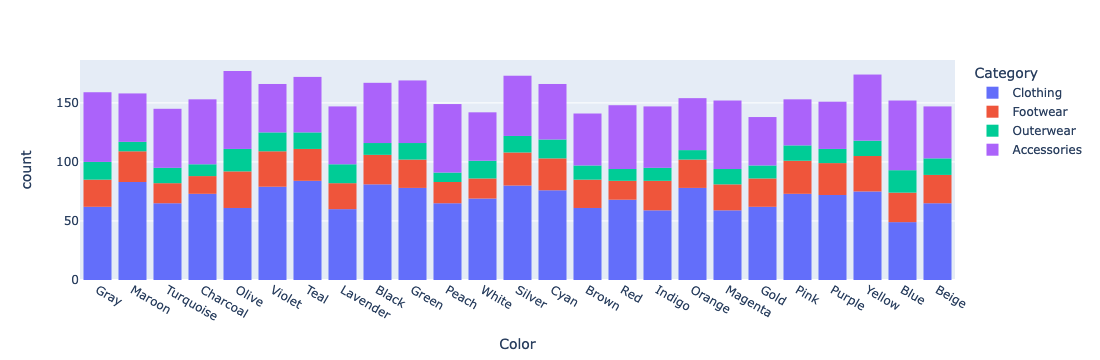

In [24]:
px.histogram(data_frame = df, x = 'Color',color='Category')

### Clothing

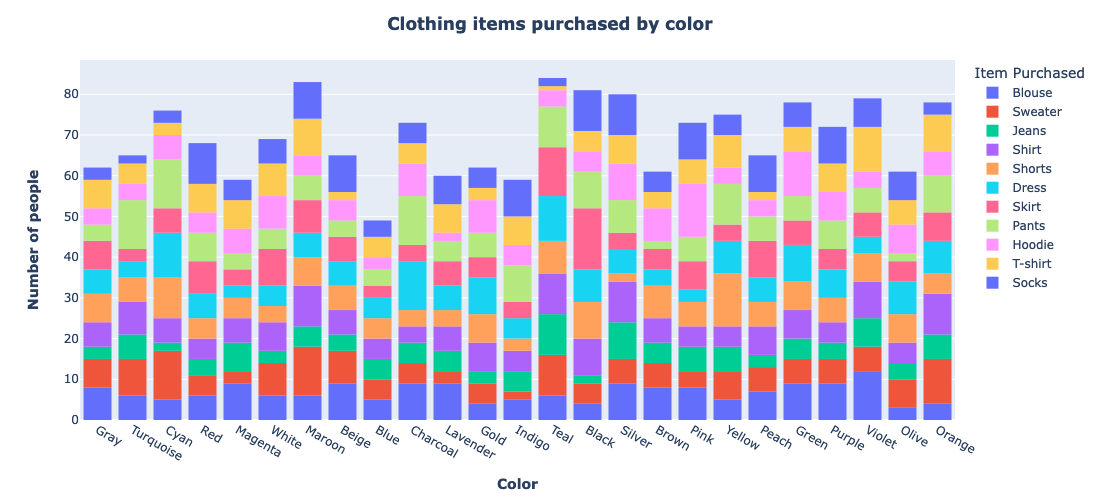

In [25]:
clothing_fig = px.histogram(data_frame = clothing, x = 'Color',color='Item Purchased')
clothing_fig.update_layout(
        title="<b>Clothing items purchased by color<b>",
        title_x=0.5,
        xaxis_title="<b>Color<b>",
        yaxis_title="<b>Number of people<b>",
        autosize=False,
        width=850,
        height=500,
    )

Teal is the most sold color in the clothing category, the items are almost evenly distributed in this color, in other words, there are various items prefered from this color with 12 skirts being the most picked clothing in the color Teal.

Black skirt has 15 purchases making it the most picked clothing item by color.

### Accessories

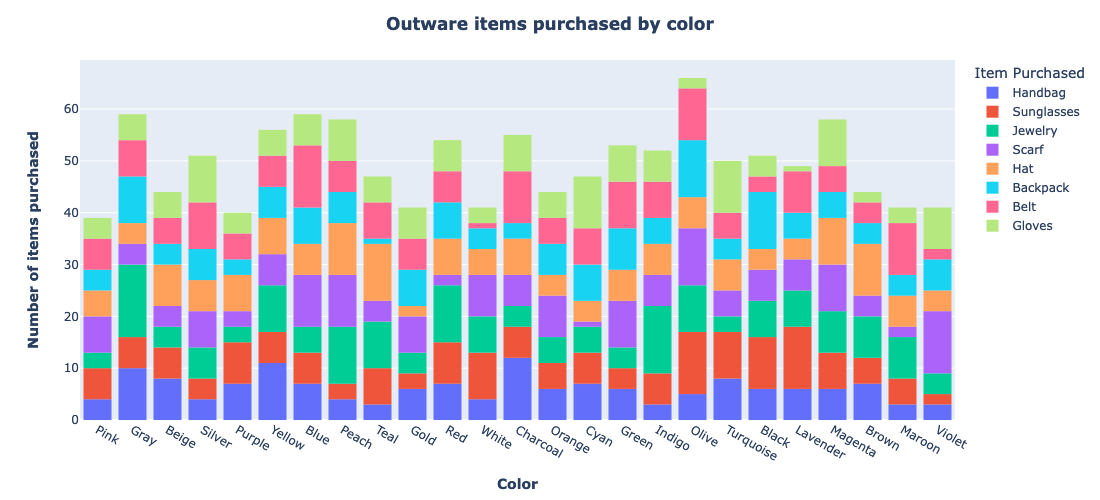

In [26]:
accessories_fig = px.histogram(data_frame = accessories, x = 'Color',color='Item Purchased')
accessories_fig.update_layout(
        title="<b>Outware items purchased by color<b>",
        title_x=0.5,
        xaxis_title="<b>Color<b>",
        yaxis_title="<b>Number of items purchased<b>",
        autosize=False,
        width=850,
        height=500,
    )

Olive is the most picked color in the accessory category, there are various items prefered from this color with 12 sunglasses being the most picked accessory in the color Olive.

Gray jewerly has 14 purchases making it the most picked accessory item by color.

## Shipping by category

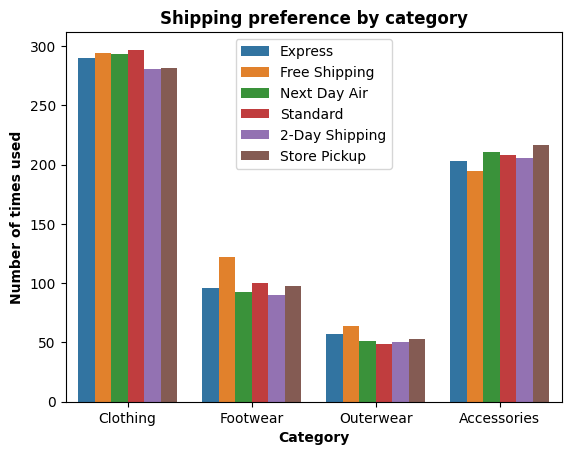

In [27]:
shipping_fig = sns.countplot(data = df, x = 'Category', hue='Shipping Type')
plt.title('Shipping preference by category',size=12,fontweight=default_fontweight)
plt.xlabel('Category', fontweight=default_fontweight)
plt.ylabel('Number of times used', fontweight=default_fontweight)
plt.legend(loc=default_location)
plt.show()

The most shipped items are clothes, with standard delivery being the most prefered shipping method and free shipping being second most prefered.

In the accessories category, the most prefered method is store pickup followed by next day air.

## Purchase frequency 

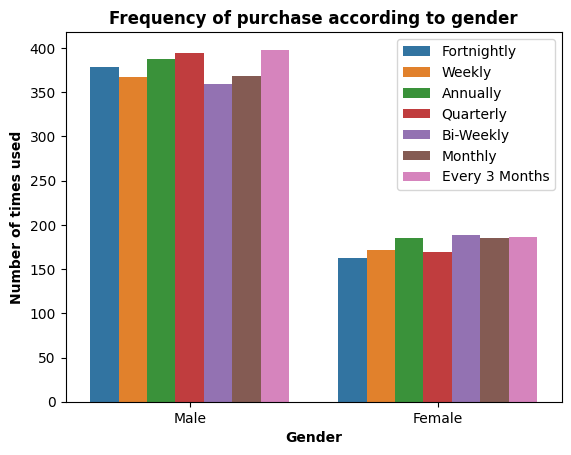

In [28]:
sns.countplot(data = df, x = 'Gender', hue='Frequency of Purchases')
plt.title('Frequency of purchase according to gender',size=12,fontweight=default_fontweight)
plt.xlabel('Gender', fontweight=default_fontweight)
plt.ylabel('Number of times used', fontweight=default_fontweight)
plt.legend(loc=default_location)
plt.show()

Males are the ones who frequently purchase items, the most frequency of their purchase is every three months.

# Subscription

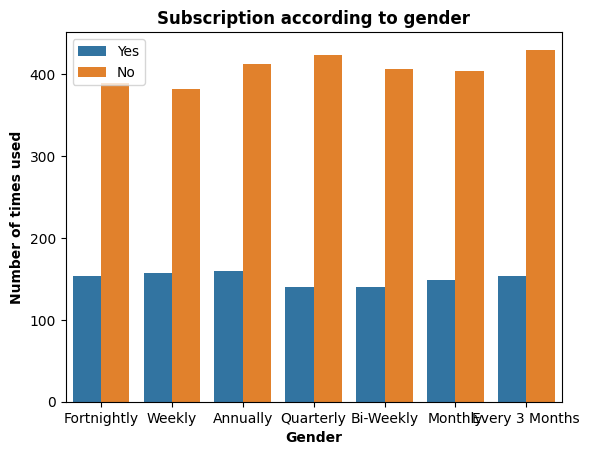

In [29]:
sns.countplot(data = df, x = 'Frequency of Purchases', hue='Subscription Status')
plt.title('Subscription according to gender',size=12,fontweight=default_fontweight)
plt.xlabel('Gender', fontweight=default_fontweight)
plt.ylabel('Number of times used', fontweight=default_fontweight)
plt.legend(loc=default_location)
plt.show()

Only males subscribed with over 1000 subscription.

In [88]:
sub_by_purchase = df[['Frequency of Purchases','Subscription Status']]
sub_by_purchase.apply(lambda x: x.factorize()[0]).corr()

Frequency of Purchases  Subscription Status
Frequency of Purchases                1.000000             0.019577
Subscription Status                   0.019577             1.000000

# Category

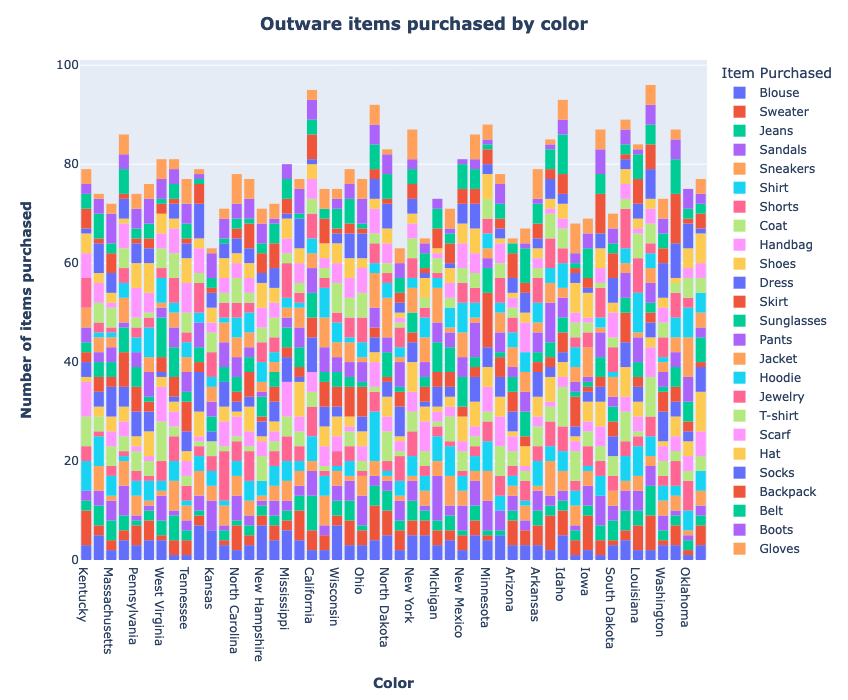

In [97]:
gh=clothing[clothing['Item Purchased']=='Blouse']
accessories_fig = px.histogram(data_frame = df, x = 'Location', color='Item Purchased')
accessories_fig.update_layout(
        title="<b>Outware items purchased by color<b>",
        title_x=0.5,
        xaxis_title="<b>Color<b>",
        yaxis_title="<b>Number of items purchased<b>",
        autosize=False,
        width=850,
        height=700,
    )

In [93]:
len(df.Location.unique())

50

# Conclusion


The most purchased items belong to the clothing group.
Pants and blouse are the most bought items in the clothing category.
Medium is the most picked size in all categories.
Males are the ones who made most purchases.
Blouse are mostly picked by the 50 to 60 years group.
The most prefered color is Teal in all, and most picked blouse color is violet.
The highest cost of the purchased item(s) in the clothing category was spent on blouse.
The most purchased items in the clothing catgory in by seasons summer, winter, fall and spring are pants, pants, skirt and sweater respectively.
The most used shipping method is standard delivery.
The only gender that subscribed is male.
Males are the ones who frequently purchase items, the most frequency of their purchase is every three months.